## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2

## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
%matplotlib inline

# importing pandas to get the dataset into a grid format on which dataset transformation can be done
import pandas as pd

#importing library to make use of mathematical operators
import math as m
import numpy as np

# to have good visualization
import seaborn as sns
import matplotlib.pyplot as plt

# for splitting the dataset into test and train population
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
#importing the dataset with a seperator ";"
stu = pd.read_csv("students-data.csv", sep=';')

In [3]:
# looking for the top 10 observations of the dataset

# We see a mix of categorical and numeric continuous variables

stu.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [4]:
stu.shape

# Basis the shape of the dataset, we could be dealing with the curse of dimentionality
    # 32 input columns variability would be difficult to get captured by 395 observations
    
# We will still go forward with the data

(395, 33)

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [5]:
#giving the index a label: "number"

stu.index.name='number'
stu.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
stu.info()

# out of the 33 variables,
#     17 are classified as object (either nominal or binary[string]) or int64(either continuous or binary[numeric])
    
# Also, there seems to be no null value in any of the variables as all have 395 entries
#    and righly tagged as per the UCI page

# But we still need to check if are there any character entry present in a column making it as an object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [7]:
#Checking for any numeric value in the object defined variables

col = stu.select_dtypes(include= object).columns

for i in col:
    Temp = pd.DataFrame(stu[i].str.isdigit())
    print(Temp[Temp[i] == True])

#We see that no digit is present into the object defined variables. Thus, no missing values are present in the dataset

Empty DataFrame
Columns: [school]
Index: []
Empty DataFrame
Columns: [sex]
Index: []
Empty DataFrame
Columns: [address]
Index: []
Empty DataFrame
Columns: [famsize]
Index: []
Empty DataFrame
Columns: [Pstatus]
Index: []
Empty DataFrame
Columns: [Mjob]
Index: []
Empty DataFrame
Columns: [Fjob]
Index: []
Empty DataFrame
Columns: [reason]
Index: []
Empty DataFrame
Columns: [guardian]
Index: []
Empty DataFrame
Columns: [schoolsup]
Index: []
Empty DataFrame
Columns: [famsup]
Index: []
Empty DataFrame
Columns: [paid]
Index: []
Empty DataFrame
Columns: [activities]
Index: []
Empty DataFrame
Columns: [nursery]
Index: []
Empty DataFrame
Columns: [higher]
Index: []
Empty DataFrame
Columns: [internet]
Index: []
Empty DataFrame
Columns: [romantic]
Index: []


In [8]:
stu.describe().T

# All variables looks in the range except the "absences" variable. THere seems to be a outlier with 75 days absent

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [9]:
# Checking Unique values

col = stu.columns

for i in col:
    print("unique value of" , i , "is" , stu[i].unique())
    
# just checking and getting an idea how the data looks like,
    # we find that even though there are numerical variables, they corrospond to a category encoded as a numeric
    
# descriptive stats like like variance and others will depend on the units in which they are defined. Thus
    # inferencing basic the descriptive stats will not be completely correct

unique value of school is ['GP' 'MS']
unique value of sex is ['F' 'M']
unique value of age is [18 17 15 16 19 22 20 21]
unique value of address is ['U' 'R']
unique value of famsize is ['GT3' 'LE3']
unique value of Pstatus is ['A' 'T']
unique value of Medu is [4 1 3 2 0]
unique value of Fedu is [4 1 2 3 0]
unique value of Mjob is ['at_home' 'health' 'other' 'services' 'teacher']
unique value of Fjob is ['teacher' 'other' 'services' 'health' 'at_home']
unique value of reason is ['course' 'other' 'home' 'reputation']
unique value of guardian is ['mother' 'father' 'other']
unique value of traveltime is [2 1 3 4]
unique value of studytime is [2 3 1 4]
unique value of failures is [0 3 2 1]
unique value of schoolsup is ['yes' 'no']
unique value of famsup is ['no' 'yes']
unique value of paid is ['no' 'yes']
unique value of activities is ['no' 'yes']
unique value of nursery is ['yes' 'no']
unique value of higher is ['yes' 'no']
unique value of internet is ['no' 'yes']
unique value of romantic i

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [10]:
col = stu.select_dtypes(include= object).columns
print(col)

# we get the list of the variables which are of the type "object"

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [11]:

ind = stu.select_dtypes(exclude = object).columns[0:-1]
print(ind)
# it gives us the list of variables which are non-object in nature (numeric in our case) and we drop the last variable
#     as it is our dependent variable

# to identify the low variance variable and to store them in a array, we are defining a array called "Low_var"
Low_Var = []
print(type(Low_Var))

# Variance of each variable can be found by using var() function and variables with variance < 1 are stored in Low_var
for i in ind:
    print("Variance of", i , "is", stu[i].var())
    
    if stu[i].var() < 1:
        Low_Var.append(i)        
print(Low_Var)

# Variables with var() < 1 are droped and the remaining variables are stored into a new dataframe " Stu_2"
Stu_2 = stu.drop(Low_Var, axis = 1)
Stu_2.head()

# We are left with 27 variables including the dependent variable

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')
<class 'list'>
Variance of age is 1.6282850350189455
Variance of Medu is 1.1984450298785598
Variance of Fedu is 1.184180427938061
Variance of traveltime is 0.4865128831202245
Variance of studytime is 0.704324359056738
Variance of failures is 0.553016770545522
Variance of famrel is 0.8039966587418893
Variance of freetime is 0.9977253742851635
Variance of goout is 1.2393882927456121
Variance of Dalc is 0.7934202917175335
Variance of Walc is 1.6586776328471353
Variance of health is 1.9329435198869143
Variance of absences is 64.04954057700951
Variance of G1 is 11.017053267364899
Variance of G2 is 14.148917303861756
['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


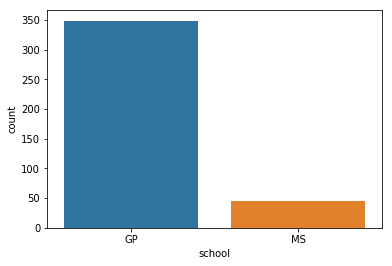

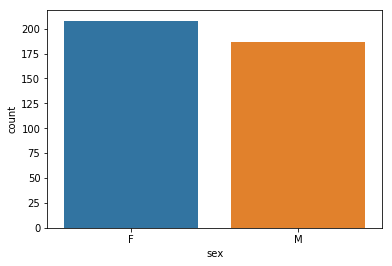

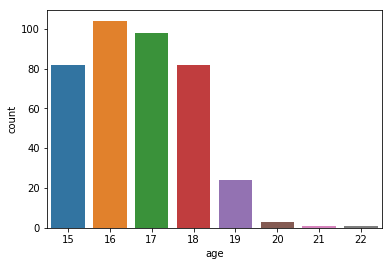

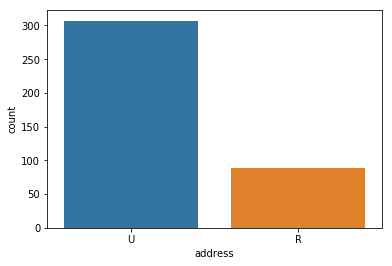

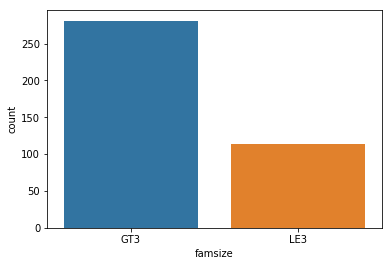

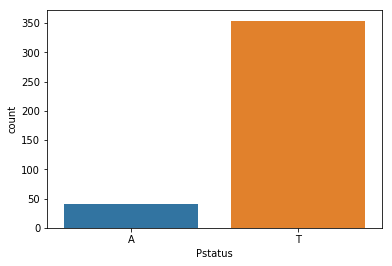

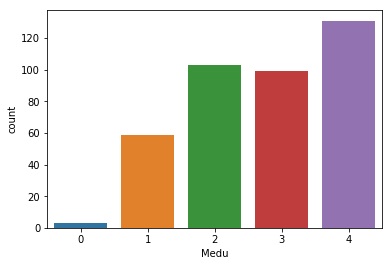

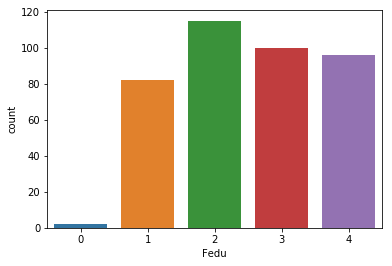

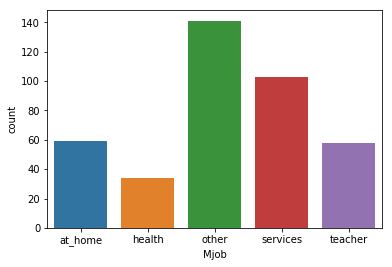

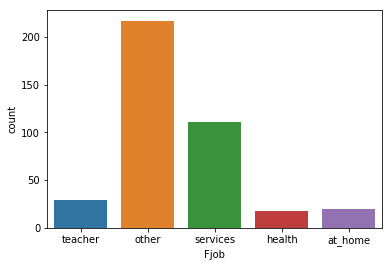

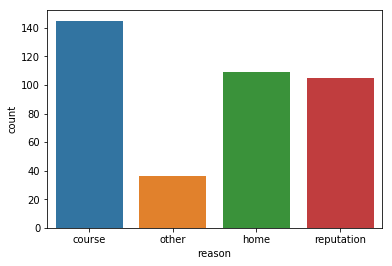

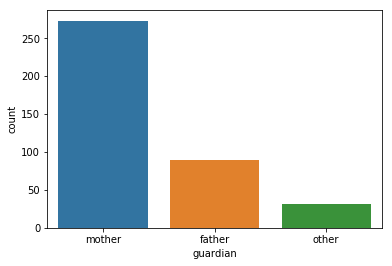

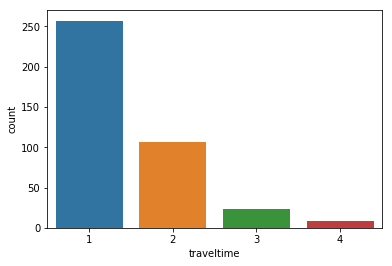

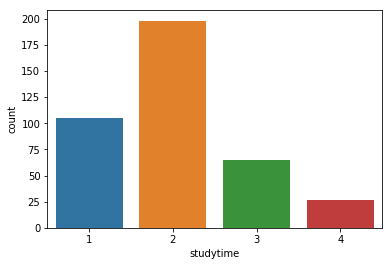

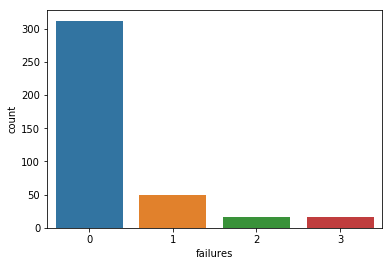

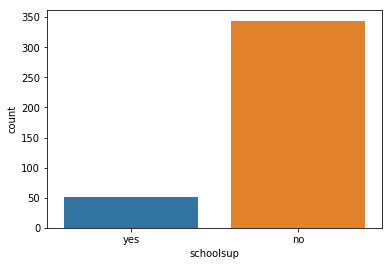

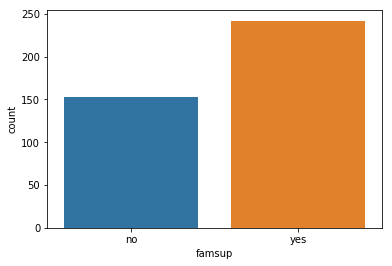

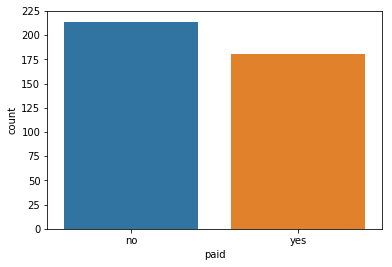

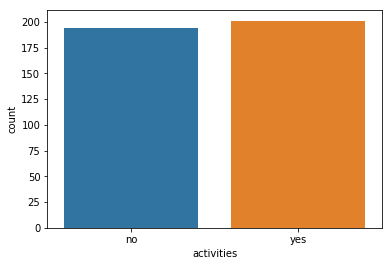

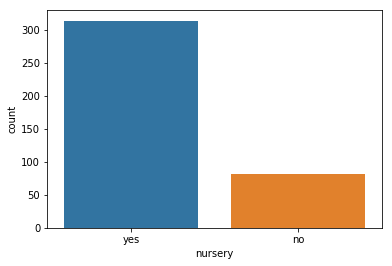

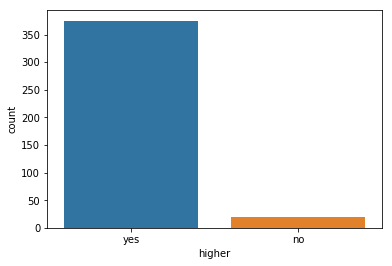

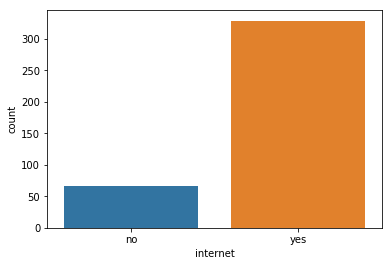

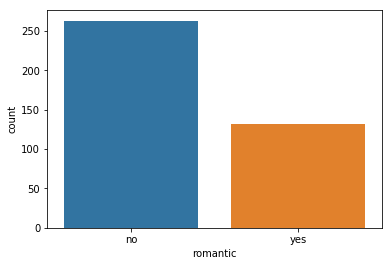

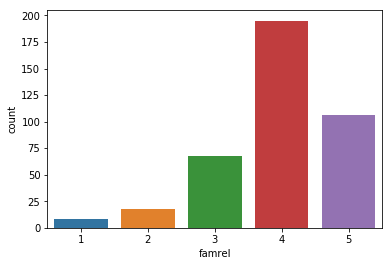

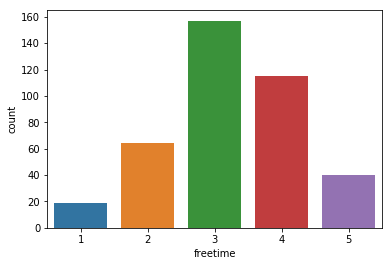

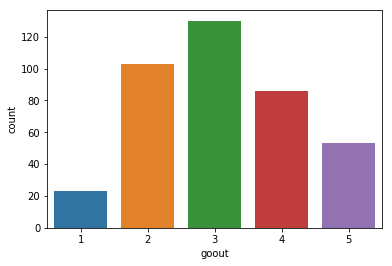

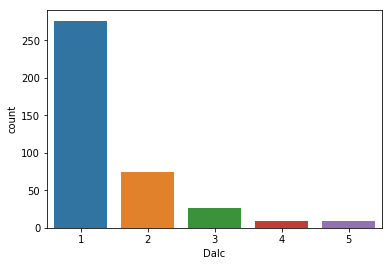

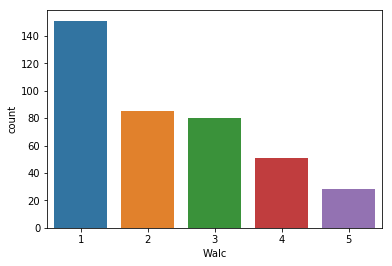

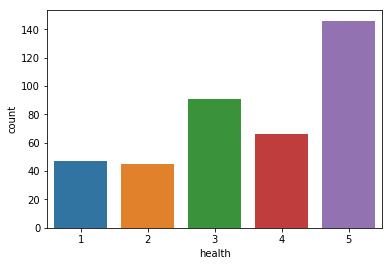

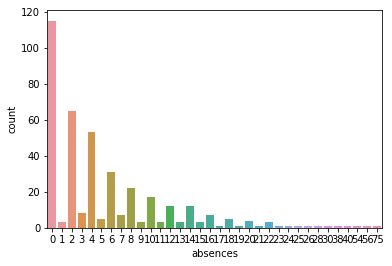

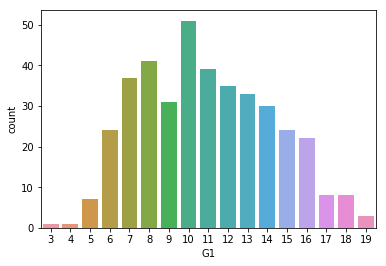

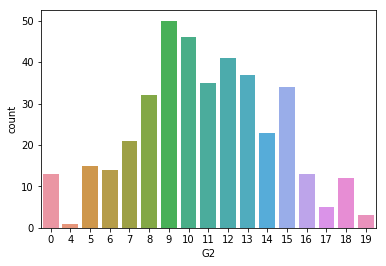

In [12]:
# To get a sense of the frequesncy distribution of all the varaibles, we are ploting the countplot for all variables

# Please not, we are doing this operation on the original dataset ("stu") and not on the new one ("Stu_2")

# Also, to perform this, we have assumed all the variables as a categorical variables basis the unique value seen before

ind = stu.columns[0:-1];
for i in ind:
    sns.countplot(x = i, data= stu)
    plt.show()
    
# Observations:
        # Variables like "School", "Pstatus", "failures","schoolsup", "nursury","higher", "internet" are highly
        # biased in one category which could be a potential differenciator in the grades
        
        # Other variables like "activities" and "paid" have almost equal distribuion among the 2 categories
        
        # We might want to look at a comparitive understanding of the variables

In [13]:
# To understand the dependency of the variables onto each other, and going forward with the assumption of all variable
#     be categorical variables, we are performing a Chi-square test of Independence on all variable combinations
    
# Alternate hypothesis will be if the p-value of the Chi2 Test is less than 0.005 then the two variables are corelated

# Excluding the variables which are corelated to the other variables could be a method to select the variables 
#    rather purely considering variables with variance > 1
    

#***************************************************************************#

# From all the columns, creating a list with all the possible combinations (nCr: where n = # of variables, r = 2)
import itertools
col = stu.columns[0:-1];
A = list(itertools.combinations(col, 2))

# Dummy varaible to store all the variables with are corelated
ditch = [];

# Performing Chi2 test of Independence on the all possible pairs and storing the corelated variables into "ditch"
import scipy

for (x,y) in A:
    TT = pd.crosstab(stu[x],stu[y])
    
    chi2, p, ddof, expected = scipy.stats.chi2_contingency(TT)
    if p <= 0.005:
        print(x,"and",y,"are corelated")
        ditch.append(x)
        
ditch = set(ditch)
ditch = list(ditch)
print(ditch)

# We find there are 19 variables which seems to be corealated with other variablea among all 32 independent variables

school and age are corelated
school and address are corelated
school and Medu are corelated
school and traveltime are corelated
school and famsup are corelated
sex and Mjob are corelated
sex and studytime are corelated
sex and famsup are corelated
sex and freetime are corelated
sex and Dalc are corelated
sex and Walc are corelated
age and address are corelated
age and guardian are corelated
age and failures are corelated
age and schoolsup are corelated
age and higher are corelated
age and Dalc are corelated
age and Walc are corelated
age and absences are corelated
address and traveltime are corelated
address and internet are corelated
Medu and Fedu are corelated
Medu and Mjob are corelated
Medu and Fjob are corelated
Medu and failures are corelated
Medu and nursery are corelated
Medu and internet are corelated
Fedu and Mjob are corelated
Fedu and Fjob are corelated
Fedu and failures are corelated
Mjob and Fjob are corelated
Mjob and internet are corelated
reason and studytime are corel

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [14]:
# Going forward we are going to use "Stu_2" as the main dataset as it has variables with var >= 1

# Shape of the dataframe: 395 x 27
Stu_2 = stu.drop(Low_Var, axis = 1)
Stu_2.head()

Stu_2.head()
Stu_2.shape

(395, 27)

In [15]:
# As observed before with the unique values, all the current categorical variables doesnot have a order, so we can
#    go froward with labelEncoder() rather than ordinalEncoder
    
from sklearn.preprocessing import LabelEncoder

inc = Stu_2.select_dtypes(include = object).columns
print(inc)
le = LabelEncoder()

for i in inc:
    Stu_2[i]= le.fit_transform(Stu_2[i]) 
    print(i,Stu_2[i].unique()) 

Stu_2.info()
Stu_2.head()

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')
school [0 1]
sex [0 1]
address [1 0]
famsize [0 1]
Pstatus [0 1]
Mjob [0 1 2 3 4]
Fjob [4 2 3 1 0]
reason [0 2 1 3]
guardian [1 0 2]
schoolsup [1 0]
famsup [0 1]
paid [0 1]
activities [0 1]
nursery [1 0]
higher [1 0]
internet [0 1]
romantic [0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null int32
sex           395 non-null int32
age           395 non-null int64
address       395 non-null int32
famsize       395 non-null int32
Pstatus       395 non-null int32
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int32
Fjob          395 non-null int32
reason        395 non-null int32
guardian      395 non-null int32
schoolsup     395 non-null int

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [16]:
# Encolding the "G1", "G2" and "G3" into "0 & 1"

col = Stu_2.columns[-3:]
print(col)

for i in col:
    aa = (Stu_2[i].unique())
    #print(type(aa))
    bb = aa[aa>=10]
    cc = aa[aa<10]
    #print(bb)
    Stu_2[i].replace(cc,0, inplace = True)
    Stu_2[i].replace(bb,1, inplace = True)
    print("Unique values of",i,"is",Stu_2[i].unique())

Stu_2.head()

Index(['G1', 'G2', 'G3'], dtype='object')
Unique values of G1 is [0 1]
Unique values of G2 is [0 1]
Unique values of G3 is [0 1]


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [17]:
# Seperating the feature and target variables into 2 different datasets

X = Stu_2.iloc[:,0:-1];
y = Stu_2.iloc[:,-1];

print(X.head())
print(y.head())
print(X.shape)
print(y.shape)

        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0   18        1        0        0     4     4     0     4   
1            0    0   17        1        0        1     1     1     0     2   
2            0    0   15        1        1        1     1     1     0     2   
3            0    0   15        1        0        1     4     2     1     3   
4            0    0   16        1        0        1     3     3     2     2   

        ...  nursery  higher  internet  romantic  goout  Walc  health  \
number  ...                                                             
0       ...        1       1         0         0      4     1       3   
1       ...        0       1         1         0      3     1       3   
2       ...        1       1         1         0      2     3       3   
3       ...        1       1         1         1      2     1       5   
4       

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

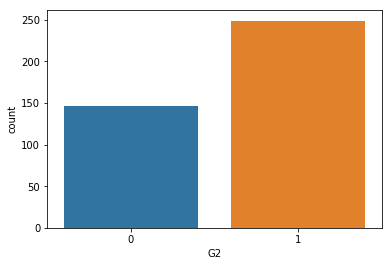

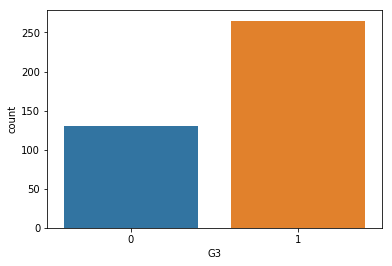

1.0985791994647682e-59
G2 and G3 are corelated


G3,0,1
G2,,
0,122,24
1,8,241


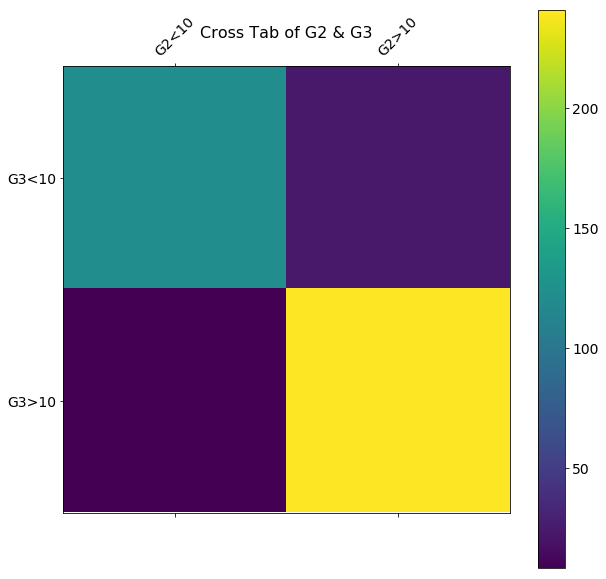

In [18]:
# PLoting  "G2" - frequency plot
sns.countplot(x= "G2", data=Stu_2)
plt.show()

# Ploting "G3" - frequency plot
sns.countplot(x = "G3", data = Stu_2)
plt.show()

# Making a crosstab between the two variables to understand the similarity
cross = pd.crosstab(Stu_2["G2"],Stu_2["G3"])

# Making a heatmap of the crosstab for easy visualization
df = cross;

f = plt.figure(figsize=(10, 10))
plt.matshow(df, fignum=f.number)
plt.xticks(Stu_2["G2"].unique(),labels=["G2<10","G2>10"], fontsize=14, rotation=45)
plt.yticks(Stu_2["G3"].unique(),labels=["G3<10","G3>10"], fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Cross Tab of G2 & G3', fontsize=16);


# Performing a Chi2 test on the two variables to statistically infer on the dependency  
import scipy

chi2, p, ddof, expected = scipy.stats.chi2_contingency(cross)
print(p)
if p <= 0.005:
    print("G2","and","G3","are corelated")

cross

## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

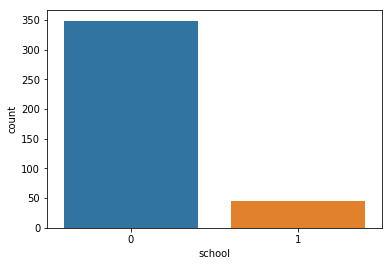

In [19]:
# Ploting "school" variable - frequency plot
# We see that it is skewed to one category (Gabriel Pereira school)

sns.countplot(x= "school", data=Stu_2)
plt.show()


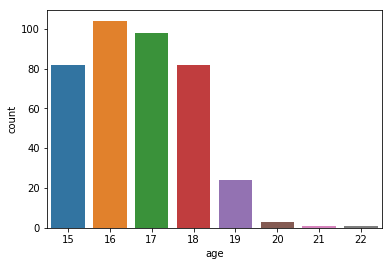

In [20]:
# Ploting "age" variable - frequency plot
# We see that students largly fall ina age bracket between [15,19] with few outliers

sns.countplot(x = "age", data = Stu_2)
plt.show()

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [21]:
# Splitting the dataset into 300 train and rest test

obs = 395;
train = 300;

test_size = (obs - train)/(obs);
seed = 1;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 26)
(95, 26)
(300,)
(95,)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [22]:
from sklearn.linear_model import LogisticRegression

# Calling the LogicticRegression object adn storing it into "model"
model = LogisticRegression()

# Fiting out dataset into the model
# By default regularized by L2
model.fit(X_train, y_train)

# Predicting the y variable using hte model fit and "x_test"
y_predict = model.predict(X_test)

#Measuring the model score/accuracy
model_score = model.score(X_test, y_test)
print(model_score)

#Looking at other attributes of the model accuracy like recall and f1-score
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

# Observations:
#    The model accuracy is 91% in the test dataset
#    tHE Recall is also 91% i.e. we predicted the students with 'G3>=10' by 91%

0.9052631578947369
[[25  3]
 [ 6 61]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.95      0.91      0.93        67

   micro avg       0.91      0.91      0.91        95
   macro avg       0.88      0.90      0.89        95
weighted avg       0.91      0.91      0.91        95



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
# Also trying to score the model using the stats model

import statsmodels.api as sm
log_mod = sm.MNLogit(y_train, X_train).fit()

print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.185962
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:                     G3   No. Observations:                  300
Model:                        MNLogit   Df Residuals:                      274
Method:                           MLE   Df Model:                           25
Date:                Sun, 06 Oct 2019   Pseudo R-squ.:                  0.7099
Time:                        14:06:58   Log-Likelihood:                -55.789
converged:                       True   LL-Null:                       -192.31
                                        LLR p-value:                 1.465e-43
      G3=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
school         0.3350      0.955      0.351      0.726      -1.537       2.207
sex           -0.3578      0.

# Naive bayes with Iris data

### Import Iris.csv

In [24]:
# Importing Iris dataset and eyeballing the top 10 observations
iris = pd.read_csv("iris.csv")
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
# Trying to understand the variable type and if any missing vaues are present or not
iris.info()

# We see that "SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm" have missing values which need to be treated 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
# Trying to look at the unique classes in the datasets which needs to be predicted 
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
# Capturing the index of the missing observations

Col = iris.columns

for i in Col:
    print(iris[iris[i].isna() == True])

    
# Last 2 observations have Missing values which are flowing as NaN into the dataset

Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
151  152            NaN           NaN            NaN           1.8   

            Species  
151  Iris-virginica  
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
150  151            5.9           NaN            NaN           NaN   
151  152            NaN           NaN            NaN           1.8   

            Species  
150  Iris-virginica  
151  Iris-virginica  
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
150  151            5.9           NaN            NaN           NaN   
151  152            NaN           NaN            NaN           1.8   

            Species  
150  Iris-virginica  
151  Iris-virginica  
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
150  151            5.9           NaN            NaN           NaN   

            S

In [28]:
# calculating the grouped mean of various Classes

t2 = iris.groupby("Species").mean()
print(t2)

# Storing the Classes into a variable to be used as a comparator or itrator
zz = iris["Species"].unique()
print(zz)

# Creating a dummy dataframe
DF = pd.DataFrame()
DF

# replacing the null values with the mean of the the class/label 
for j in range(0,3,1):
    tt = iris[iris[Col[5]] == zz[j]]
    #print(tt)
    for i in range(1,5,1):       
        tt[Col[i]] = tt[Col[i]].replace(np.NaN,tt[Col[i]].mean())
    #print(tt)
    DF = DF.append(tt, ignore_index=True)
    #print(DF)

    
iris = DF;
print(iris.describe())
iris.tail()

# Dropping ID column from the dataset
iris1 = iris.drop("Id", axis = 1)
iris1.head()
iris1.tail()

# All the NaN values has been replaced withe their respective Class and variable mean value

                    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       25.5        5.00600         3.418          1.464   
Iris-versicolor   75.5        5.93600         2.770          4.260   
Iris-virginica   126.5        6.57451         2.974          5.552   

                 PetalWidthCm  
Species                        
Iris-setosa          0.244000  
Iris-versicolor      1.326000  
Iris-virginica       2.021569  
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  152.000000     152.000000    152.000000     152.000000    152.000000
mean    76.500000       5.848517      3.052947       3.782263      1.208037
std     44.022721       0.824710      0.430810       1.764648      0.762556
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.750000       5.100000      2.800000       1.600000      0.300000
50%     76.500000       5.800000      3.000000       4.400000      1.300000
75%    114.250000       6.400000      3.300000       5.100000      1.800000
max    152.000000       7.900000      4.400000       6.900000      2.500000


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,6.50000,3.000,5.200,2.000000,Iris-virginica
148,6.20000,3.400,5.400,2.300000,Iris-virginica
149,5.90000,3.000,5.100,1.800000,Iris-virginica
150,5.90000,2.974,5.552,2.021569,Iris-virginica
151,6.57451,2.974,5.552,1.800000,Iris-virginica


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [29]:
# Splitting the dataset into the feature space and the target variable

X = iris1.iloc[:,0:-1];
y = iris1.iloc[:,-1];

print(X.head())
print(y.head())
print(X.shape)
print(y.shape)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object
(152, 4)
(152,)


### Find the distribution of target variable (Class)

In [30]:
# Distribution of Species across its unoque values
pd.value_counts(iris1["Species"])

# Class 1 - "Iris-virginica" have 2 more observations than other 2 classes

Iris-virginica     52
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64


### Plot the distribution of target variable using histogram

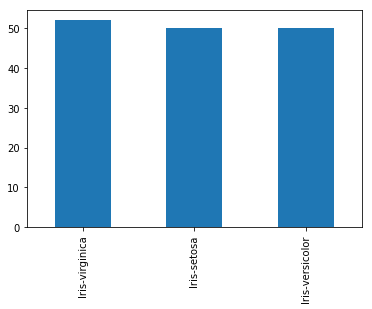

In [31]:
#Visual representation of the above distribution

pd.value_counts(iris1["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

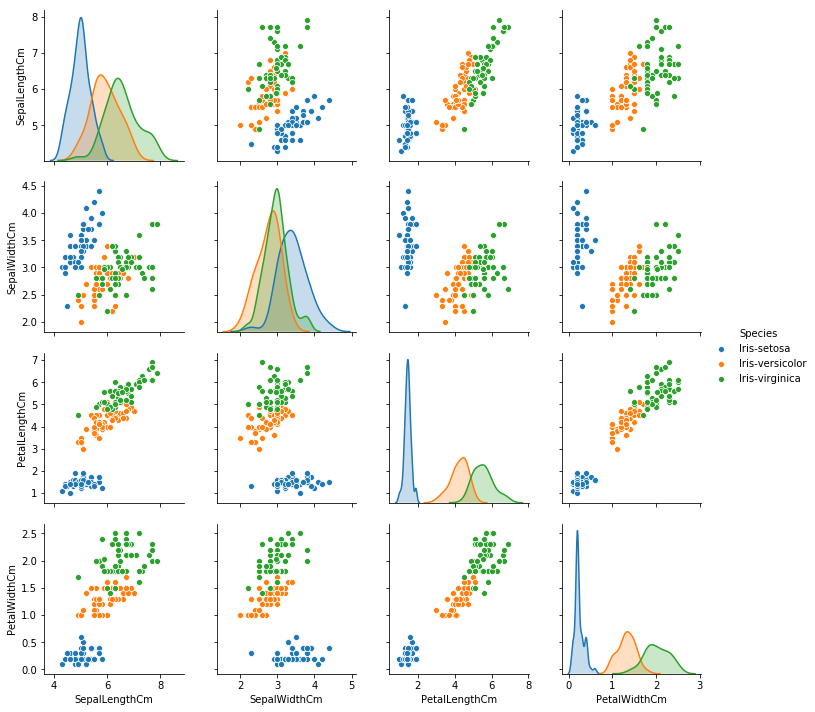

In [32]:
# Doing a bi-variate analysis on the independent variables within difrerent classes
sns.pairplot(iris1, hue = "Species")

# Observations:
#    Sepal_Length, Petal_Length and Petal_Width looks to be a good seperator of the 3 different calsses 
#    Sepal_Width overlaps in all the 3 classes so wount act as a good classifying variable

### Summary Statistics and explain insights for at least 2 variables

In [33]:
# Understanding the summary statistics of the data:

iris1.describe()

# Observation:
#   Mean and Median of Sepal_Length nad Petal_Width doesnot vary much
#   Large Standard deviation is seen for Petal_Length
#   Petal_Lengh might have a right tail as its "Q3 - Q2" is larger than "Q2 - Q1"

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,152.000000,152.000000,152.000000
mean,5.848517,3.052947,3.782263,1.208037
std,0.824710,0.430810,1.764648,0.762556
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Correlation among all variables and give your insights

In [34]:
# Encoding the Classes into a numeric format

iris1["Species"] = iris1["Species"].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

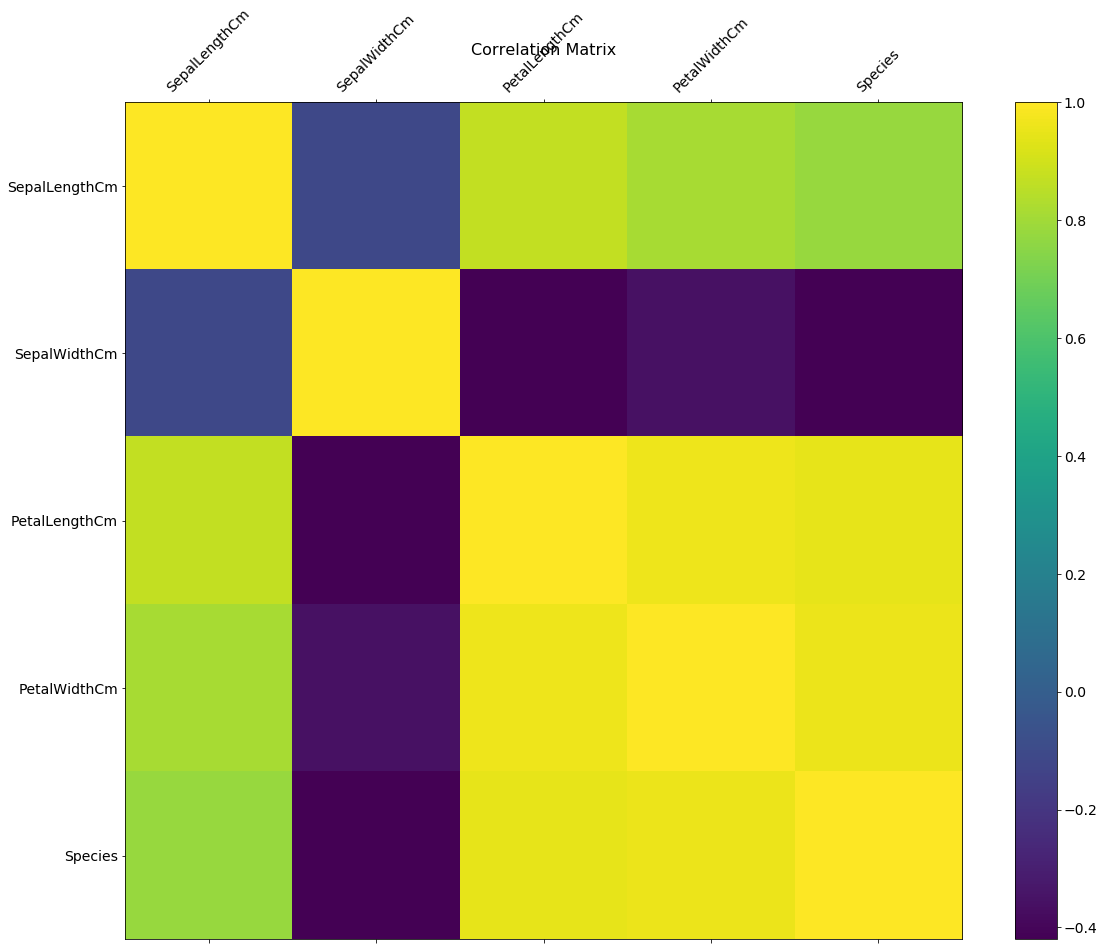

In [35]:
# Ploting a corelation matrix between the dependent and independent variables

df = iris1;

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#Observations:
#    No corelation is seen between Septal_Width and Septal_Length
#    Spetal_Width have light negative coreation with other 3 indeoendent variables
#    Petal_Length and Petal_Width are highly corelated

### Split data in Training and Validation in 80:20

In [36]:
# Normalizing the feature space using the z-score
from scipy.stats import zscore
X_z = X.apply(zscore)
print(X_z.shape)
print(y.shape)

# Spliting the training and test dataset into 80:20 ratio 
test_size = 0.20;
seed = 1;

X_train, X_test, y_train, y_test = train_test_split(X_z, y, test_size=test_size, random_state=seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(152, 4)
(152,)
(121, 4)
(31, 4)
(121,)
(31,)


### Do Feature Scaling

In [37]:
#Done in the above step

### Train and Fit NaiveBayes Model

In [38]:
from sklearn.naive_bayes import GaussianNB


# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
# Scoring he model on the training dataset
model.score(X_train, y_train)

0.9504132231404959

### Print Accuracy and Confusion Matrix and Conclude your findings

In [40]:
# Predicting the Classes using the built model and the test features
y_pred = model.predict(X_test)

In [41]:
# ALso looking at the confusion matrix and sensitivity of the model

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

# We find the model have predicted the Classes with 100% accuracy with 100% recall and F1-score

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         8

      micro avg       1.00      1.00      1.00        31
      macro avg       1.00      1.00      1.00        31
   weighted avg       1.00      1.00      1.00        31

[[10  0  0]
 [ 0 13  0]
 [ 0  0  8]]


In [42]:
# Performing K-fold validation on the model built

from sklearn.model_selection import cross_val_score, cross_val_predict

scores = cross_val_score(model, X_train, y_train, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

# The model prediction accuracy cons to be 93%

Cross-validated scores: [0.92307692 0.92307692 1.         0.92307692 1.         0.83333333
 1.         0.90909091 0.90909091 0.90909091] [0.92307692 0.92307692 1.         0.92307692 1.         0.83333333
 1.         0.90909091 0.90909091 0.90909091]
Average score: 0.9329836829836828


In [43]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         8

      micro avg       1.00      1.00      1.00        31
      macro avg       1.00      1.00      1.00        31
   weighted avg       1.00      1.00      1.00        31

[[10  0  0]
 [ 0 13  0]
 [ 0  0  8]]
